<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week08-workshop-2/Week8_ML_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
print(type(housing))
print(housing.data)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
<class 'sklearn.utils._bunch.Bunch'>
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


Text(0.5, 1.0, 'California Housing Data - Location')

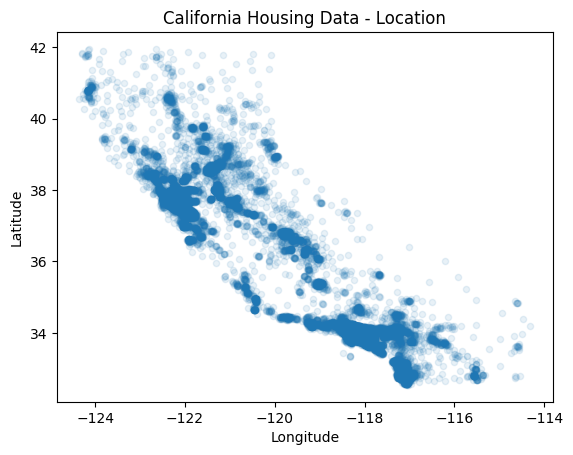

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)
plt.title("California Housing Data - Location")

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14448, 8)
Shape of X_test: (6192, 8)
Shape of y_train: (14448,)
Shape of y_test: (6192,)


## Holdout technique

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.5305677824766757
R-squared (R2): 0.595770232606166


#Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', 'passthrough'),
    ('regressor', 'passthrough')
])

pr = range(1,3)
param_grid = [
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in pr],
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in pr],
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in pr],
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    }
]

## GridSearchCV

In [7]:
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', 'passthrough'),
                                       ('regressor', 'passthrough')]),
             n_jobs=-1,
             param_grid=[{'poly': [PolynomialFeatures(degree=1),
                                   PolynomialFeatures()],
                          'regressor': [Ridge()],
                          'regressor__alpha': [0.1, 1.0, 10.0]},
                         {'poly': [PolynomialFeatures(degree=1),
                                   PolynomialFeatures()],
                          'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 1.0, 10.0]},
                         {'poly': [PolynomialFeatures(degree=1),
                                   PolynomialFeatures()],
                          'regressor': [ElasticNet()],
                          'regressor__alpha': [0.1, 1.0, 10.0],
                          'regressor__l1_ratio': [0.1, 0.5, 0.9]}],
             scoring='neg_mean_squared_error')

In [8]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.5305653650779776
R-squared (R2): 0.5957720743774642


## Print results


In [9]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nEvaluation metrics for the best model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Best parameters found by GridSearchCV:
{'poly': PolynomialFeatures(degree=1), 'regressor': Ridge(), 'regressor__alpha': 0.1}

Evaluation metrics for the best model:
Mean Squared Error (MSE): 0.5305653650779776
R-squared (R2): 0.5957720743774642


## RandomizedSearchCV

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', 'passthrough'),
    ('regressor', 'passthrough')
])

param_distributions = [
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in [1, 2]],
        'regressor': [Ridge()],
        'regressor__alpha': loguniform(0.01, 100)
    },
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in [1, 2]],
        'regressor': [Lasso()],
        'regressor__alpha': loguniform(0.01, 100)
    },
    {
        'poly': [PolynomialFeatures(degree=deg) for deg in [1, 2]],
        'regressor': [ElasticNet()],
        'regressor__alpha': loguniform(0.01, 100)
    }
]

random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print("\nEvaluation metrics for the best model found by RandomizedSearchCV:")
print(f"Mean Squared Error (MSE): {mse_random}")
print(f"R-squared (R2): {r2_random}")

Best parameters found by RandomizedSearchCV:
{'regressor__alpha': 0.1, 'regressor': Ridge(), 'poly': PolynomialFeatures(degree=1)}

Evaluation metrics for the best model found by RandomizedSearchCV:
Mean Squared Error (MSE): 0.5305653650779776
R-squared (R2): 0.5957720743774642


## Use bayesSearchCV

In [11]:
!pip install scikit-optimize

In [12]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', 'passthrough'),
    ('regressor', 'passthrough')
])

search_space = [
    {
        'poly': Categorical([PolynomialFeatures(degree=deg) for deg in [1, 2, 3]]),
        'regressor': Categorical([Ridge()]),
        'regressor__alpha': Real(0.01, 100, prior='log-uniform')
    },
    {
        'poly': Categorical([PolynomialFeatures(degree=deg) for deg in [1, 2, 3]]),
        'regressor': Categorical([Lasso()]),
        'regressor__alpha': Real(0.01, 100, prior='log-uniform')
    },
    {
        'poly': Categorical([PolynomialFeatures(degree=deg) for deg in [1, 2, 3]]),
        'regressor': Categorical([ElasticNet()]),
        'regressor__alpha': Real(0.01, 100, prior='log-uniform'),
        'regressor__l1_ratio': Real(0.0, 1.0, prior='uniform')
    }
]

bayes_search = BayesSearchCV(
    pipeline,
    search_space,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print("Best parameters found by BayesSearchCV:")
print(bayes_search.best_params_)

best_bayes_model = bayes_search.best_estimator_
y_pred_bayes = best_bayes_model.predict(X_test)

mse_bayes = mean_squared_error(y_test, y_pred_bayes)
r2_bayes = r2_score(y_test, y_pred_bayes)

print("\nEvaluation metrics for the best model found by BayesSearchCV:")
print(f"Mean Squared Error (MSE): {mse_bayes}")
print(f"R-squared (R2): {r2_bayes}")

Best parameters found by BayesSearchCV:
OrderedDict({'poly': PolynomialFeatures(degree=1), 'regressor': Ridge(), 'regressor__alpha': 9.228497044562662})

Evaluation metrics for the best model found by BayesSearchCV:
Mean Squared Error (MSE): 0.5303562663714501
R-squared (R2): 0.5959313828094752


In [13]:
!pip install optuna

In [14]:
!pip install wandb -qqq

In [28]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
import numpy as np
import wandb

# The objective function for Optuna
def objective(trial):

    #init wandb
    wandb.init(project="hyperparameter-tuning-3", reinit=True, group="optuna-study3", job_type=f"trial-{trial.number}")

    regressor_name = trial.suggest_categorical("regressor", ["Ridge", "Lasso", "ElasticNet"])
    poly_degree = trial.suggest_int("poly_degree", 1, 3)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=poly_degree)),
        ('regressor', None)
    ])

    if regressor_name == "Ridge":
        alpha = trial.suggest_float("ridge_alpha", 0.01, 100, log=True)
        pipeline.set_params(regressor=Ridge(alpha=alpha))

    elif regressor_name == "Lasso":
        alpha = trial.suggest_float("lasso_alpha", 0.01, 100, log=True)
        pipeline.set_params(regressor=Lasso(alpha=alpha))

    elif regressor_name == "ElasticNet":
        alpha = trial.suggest_float("elasticnet_alpha", 0.01, 100, log=True)
        l1_ratio = trial.suggest_float("elasticnet_l1_ratio", 0.0, 1.0)
        pipeline.set_params(regressor=ElasticNet(alpha=alpha, l1_ratio=l1_ratio))

    #elif regressor_name == "SGDRegressor":
    #    max_iter = trial.suggest_int("sgd_max_iter", 1000, 5000)
    #    tol = trial.suggest_float("sgd_tol", 1e-5, 1e-3, log=True)
    #    pipeline.set_params(regressor=SGDRegressor(max_iter=max_iter, tol=tol, early_stopping=True))

    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

    # Log metrics and hyperparameters to W&B
    wandb.log({"mse": -score.mean()})
    wandb.log(trial.params)

    wandb.finish()

    return -score.mean() # Return the mean of the negative MSE for Optuna to minimize


study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=10)

# Check if any trials completed before accessing best_params
if study.best_trial is not None:
    print("Best parameters found by Optuna:")
    print(study.best_params)

    best_params = study.best_params
    best_regressor_name = best_params["regressor"]
    best_poly_degree = best_params["poly_degree"]

    best_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=best_poly_degree)),
        ('regressor', None)
    ])

    if best_regressor_name == "Ridge":
        best_alpha = best_params["ridge_alpha"]
        best_pipeline.set_params(regressor=Ridge(alpha=best_alpha))

    elif best_regressor_name == "Lasso":
        best_alpha = best_params["lasso_alpha"]
        best_pipeline.set_params(regressor=Lasso(alpha=best_alpha))

    elif best_regressor_name == "ElasticNet":
        best_alpha = best_params["elasticnet_alpha"]
        best_l1_ratio = best_params["elasticnet_l1_ratio"]
        best_pipeline.set_params(regressor=ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio))

    #elif best_regressor_name == "SGDRegressor":
    #    best_max_iter = best_params["sgd_max_iter"]
    #    best_tol = best_params["sgd_tol"]
    #    best_pipeline.set_params(regressor=SGDRegressor(max_iter=best_max_iter, tol=best_tol))

    best_pipeline.fit(X_train, y_train)

    y_pred = best_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nEvaluation metrics for the best model found by Optuna:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
else:
    print("Optuna did not complete any trials successfully.")

[I 2025-09-26 12:12:58,356] A new study created in memory with name: no-name-222e012c-04ce-4334-a1e4-2e46f8e67dee


mse,▁
poly_degree,▁
ridge_alpha,▁
mse,132000.26743
poly_degree,3
regressor,Ridge
ridge_alpha,0.06327


[I 2025-09-26 12:13:00,025] Trial 0 finished with value: 132000.26743415676 and parameters: {'regressor': 'Ridge', 'poly_degree': 3, 'ridge_alpha': 0.06326824313734114}. Best is trial 0 with value: 132000.26743415676.


mse,▁
poly_degree,▁
ridge_alpha,▁
mse,0.52581
poly_degree,1
regressor,Ridge
ridge_alpha,0.23945


[I 2025-09-26 12:13:01,751] Trial 1 finished with value: 0.5258103879843038 and parameters: {'regressor': 'Ridge', 'poly_degree': 1, 'ridge_alpha': 0.23944578010826248}. Best is trial 1 with value: 0.5258103879843038.


mse,▁
poly_degree,▁
ridge_alpha,▁
mse,73.39617
poly_degree,2
regressor,Ridge
ridge_alpha,3.35756


[I 2025-09-26 12:13:03,920] Trial 2 finished with value: 73.3961738877832 and parameters: {'regressor': 'Ridge', 'poly_degree': 2, 'ridge_alpha': 3.357564743791933}. Best is trial 1 with value: 0.5258103879843038.


lasso_alpha,▁
mse,▁
poly_degree,▁
lasso_alpha,1.94199
mse,1.33973
poly_degree,2
regressor,Lasso


[I 2025-09-26 12:13:05,568] Trial 3 finished with value: 1.3397256169396126 and parameters: {'regressor': 'Lasso', 'poly_degree': 2, 'lasso_alpha': 1.9419890174249423}. Best is trial 1 with value: 0.5258103879843038.


elasticnet_alpha,▁
elasticnet_l1_ratio,▁
mse,▁
poly_degree,▁
elasticnet_alpha,3.75619
elasticnet_l1_ratio,0.75301
mse,1.27334
poly_degree,3
regressor,ElasticNet


[I 2025-09-26 12:13:07,491] Trial 4 finished with value: 1.273343312588535 and parameters: {'regressor': 'ElasticNet', 'poly_degree': 3, 'elasticnet_alpha': 3.756185313106986, 'elasticnet_l1_ratio': 0.7530144942722683}. Best is trial 1 with value: 0.5258103879843038.


elasticnet_alpha,▁
elasticnet_l1_ratio,▁
mse,▁
poly_degree,▁
elasticnet_alpha,0.77654
elasticnet_l1_ratio,0.88858
mse,1.22015
poly_degree,2
regressor,ElasticNet


[I 2025-09-26 12:13:09,021] Trial 5 finished with value: 1.2201473896868944 and parameters: {'regressor': 'ElasticNet', 'poly_degree': 2, 'elasticnet_alpha': 0.7765396521554759, 'elasticnet_l1_ratio': 0.8885828406798646}. Best is trial 1 with value: 0.5258103879843038.


lasso_alpha,▁
mse,▁
poly_degree,▁
lasso_alpha,0.22523
mse,0.78146
poly_degree,3
regressor,Lasso


[I 2025-09-26 12:13:13,301] Trial 6 finished with value: 0.7814559102508243 and parameters: {'regressor': 'Lasso', 'poly_degree': 3, 'lasso_alpha': 0.2252304321926922}. Best is trial 1 with value: 0.5258103879843038.


mse,▁
poly_degree,▁
ridge_alpha,▁
mse,119936.87177
poly_degree,3
regressor,Ridge
ridge_alpha,0.08965


[I 2025-09-26 12:13:15,672] Trial 7 finished with value: 119936.87176995001 and parameters: {'regressor': 'Ridge', 'poly_degree': 3, 'ridge_alpha': 0.08964774499417767}. Best is trial 1 with value: 0.5258103879843038.


mse,▁
poly_degree,▁
ridge_alpha,▁
mse,0.52705
poly_degree,1
regressor,Ridge
ridge_alpha,72.93306


[I 2025-09-26 12:13:18,106] Trial 8 finished with value: 0.5270516805003358 and parameters: {'regressor': 'Ridge', 'poly_degree': 1, 'ridge_alpha': 72.93306026859408}. Best is trial 1 with value: 0.5258103879843038.


lasso_alpha,▁
mse,▁
poly_degree,▁
lasso_alpha,17.73219
mse,1.3649
poly_degree,3
regressor,Lasso


[I 2025-09-26 12:13:19,742] Trial 9 finished with value: 1.364904425834719 and parameters: {'regressor': 'Lasso', 'poly_degree': 3, 'lasso_alpha': 17.732194797017243}. Best is trial 1 with value: 0.5258103879843038.


Best parameters found by Optuna:
{'regressor': 'Ridge', 'poly_degree': 1, 'ridge_alpha': 0.23944578010826248}

Evaluation metrics for the best model found by Optuna:
Mean Squared Error (MSE): 0.5305619987728772
R-squared (R2): 0.5957746391029763
